
## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$ 

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.

In [300]:

import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [301]:
# a)
def exp_n(x,N):
  s = np.zeros(N+1)
  for n in range(N+1):
    s[n]=(((-1)**n)*((x**n)/math.factorial(n)))
  return s, np.sum(s)


In [302]:
# b)
from numpy import random
x=random.random()
n=0
expn = exp_n(x,n)


while np.abs(expn[0][-1])>np.abs(1e-7*expn[1]):
     n+=1
     expn=exp_n(x,n)

expt=np.exp(-x)
error=np.abs(expt-expn[-1])

print(f'x={x}')
print(f'N={n}')
print(f'exp(-x)={expn[-1]} (exponencial computacional)')
print(f'exp(-x)={expt} (expoencial teorico)')
print(f'error={error}')


x=0.022035837742146236
N=4
exp(-x)=0.9782051778012394 (exponencial computacional)
exp(-x)=0.9782051777581001 (expoencial teorico)
error=4.313926993404493e-11


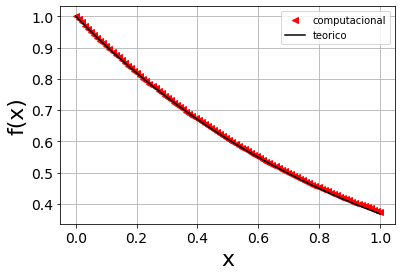

In [303]:
# b)
def exp_nvalor(x,N):
  sum = 0
  for n in range(0,N+1):
    sum = sum + (((-1)**n)*((x**n)/math.factorial(n)))
  return sum 
N = n
x = np.linspace(0,1,100)
plt.plot(x,exp_nvalor(x,N),"r<",label = "computacional")
plt.plot(x,np.exp(-x),"black",label = "teorico")
plt.xticks(fontsize = 14 ) 
plt.yticks(fontsize = 14 )
plt.xlabel("x", fontsize = 22)   
plt.ylabel("f(x)", fontsize = 22)
plt.legend()
plt.grid()


[ 1.00000000e+00 -8.00947461e+00  3.25758418e+01 -8.93082841e+01
  1.85219700e+02 -3.09450881e+02  4.33336126e+02 -5.22681114e+02
  5.53970517e+02 -5.23814542e+02  4.47213171e+02 -3.48100423e+02
  2.49012713e+02 -1.64808490e+02  1.01499483e+02 -5.84535115e+01
  3.16147663e+01 -1.61186373e+01  7.77318980e+00 -3.55590546e+00
  1.54755434e+00 -6.41945252e-01  2.54702067e-01 -9.65292920e-02
  3.53211252e-02 -1.21949942e-02  4.27020851e-03 -1.22397023e-03
  5.43874907e-04 -5.34426264e-06  1.59594943e-04  1.11658956e-04
  1.25155145e-04  1.21470491e-04  1.22446868e-04  1.22195535e-04
  1.22258435e-04  1.22243119e-04  1.22246750e-04  1.22245911e-04
  1.22246100e-04  1.22246058e-04  1.22246067e-04  1.22246065e-04
  1.22246066e-04  1.22246066e-04  1.22246066e-04  1.22246066e-04
  1.22246066e-04  1.22246066e-04]


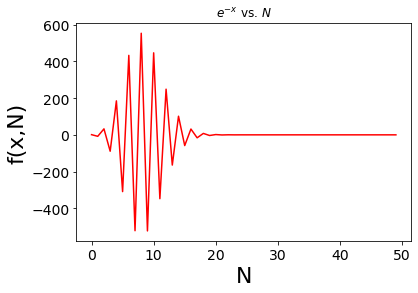

In [316]:
N=np.arange(0,50)
x=random.uniform(9,10)
Y=np.array([exp_n(x,n)[-1] for n in N])
plt.title(r'$e^{-x}$ vs. $N$')
plt.plot(N,Y,'r',label=f'x={r}')
plt.xlabel('N',fontsize=22)
plt.ylabel(('f(x,N)'),fontsize=22)
plt.xticks(fontsize = 14 ) 
plt.yticks(fontsize = 14 )
print(Y)

In [ ]:
# d)
def exp_ni(x,N):
  s = np.zeros(N+1)
  for n in range(N+1):
    s[n]= 1/(((-1)**n)*((x**n)/math.factorial(n)))
  return s, np.sum(s)

x=10
n=0
expn = exp_ni(x,n)


while np.abs(expn[0][-1])>np.abs(1e-7*expn[1]):
     n+=1
     expn=exp_ni(x,n)

expt= np.exp(-x)
error=np.abs(expt-expn[-1])

print(f'x={x}')
print(f'N={n}')
print(f'exp(-x)={expn[-1]} (exponencial computacional inverso)')
print(f'exp(-x)={expt} (expoencial teorico inverso)')
print(f'error={error}')


x=10
N=296
exp(-x)=inf (exponencial computacional inverso)
exp(-x)=4.5399929762484854e-05 (expoencial teorico inverso)
error=inf


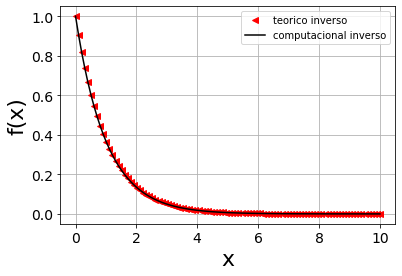

In [317]:

def exp_ivalor(x):
  return 1/np.exp(x)


x = np.linspace(0,10,100)
N = n
plt.plot(x,exp_ivalor(x),"r<",label="teorico inverso")
plt.plot(x,1/np.exp(x),"black",label="computacional inverso")
plt.xticks(fontsize = 14 ) 
plt.yticks(fontsize = 14 )
plt.xlabel("x", fontsize = 22)   
plt.ylabel("f(x)", fontsize = 22)
plt.xticks(fontsize = 14 ) 
plt.yticks(fontsize = 14 )
plt.legend()
plt.grid()

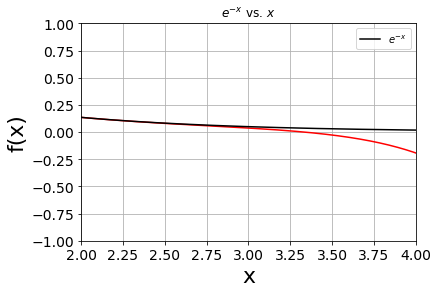

la serie pierde presicion cuando x se aproxima a 3


In [350]:
# e)
# 1 a 10
X = np.linspace(1,10,1000)
N = 9
Y = np.array([exp_n(x,N)[-1] for x in X])
plt.title(r'$e^{-x}$ vs. $x$')
plt.plot(X,Y,'r-',)
plt.plot(X,np.exp(-X),'black',label=r'$e^{-x}$')
plt.grid()
plt.legend()
plt.ylim(-1,1)
plt.xlim(2,4)
plt.xlabel('x',fontsize=22)
plt.ylabel('f(x)',fontsize=22)
plt.xticks(fontsize = 14 ) 
plt.yticks(fontsize = 14 )
plt.show()

print('la serie pierde presicion cuando x se aproxima a 3')

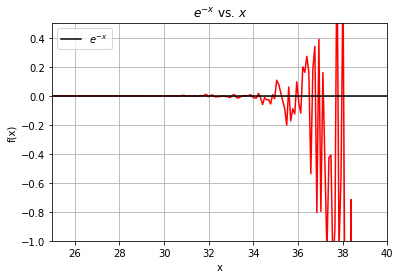

cuando x toma valores cercanos a 31 la serie pierde presicion


In [361]:
#10 a 100
X = np.linspace(10,100,1000)
N = 99
Y = np.array([exp_n(x,N)[-1] for x in X])
plt.title(r'$e^{-x}$ vs. $x$')
plt.plot(X,Y,'r-',)
plt.plot(X,np.exp(-X),'black',label=r'$e^{-x}$')
plt.grid()
plt.legend()
plt.ylim(-1,0.5)
plt.xlim(25,40)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

print('cuando x toma valores cercanos a 31 la serie pierde presicion')

In [371]:
# f)
x = np.linspace(0,100,10)
t = exp_ivalor(x)
Nesimo = np.arange(0, 100, 50)
y = []
error = []
for j in x:
 for i in Nesimo:
   val = exp_nvalor(j,i)
   y.append(val)
   e = np.fabs(val - t)/t
   error.append(e)

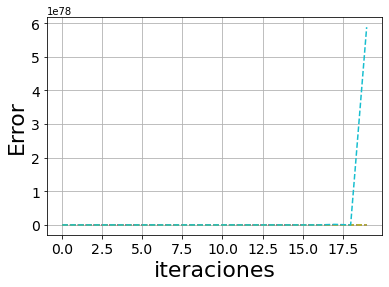

In [372]:


plt.plot(error,'--')
plt.xlabel("iteraciones",fontsize = 22)
plt.ylabel("Error",fontsize = 22)
plt.xticks(fontsize = 14 ) 
plt.yticks(fontsize = 14 )
plt.grid()

0## **Errores de redondeo**. Caos numérico en un mapa logístico y errores de punto flotante (Errores de redondeo)

> Un ejemplo clásico de caos,  es el comportamiento no lineal en las interaciones de un mapa logistico 

\begin{equation}
x_{n+1}=f(x_n)=rx_n(1-x_n)
\end{equation}

> con $x\in (0,1)$ y $r\in(0,4)$ se pueden producir varios comportamientos sorprendentes.


> ### Problema: 
Encontrar tres formas diferentes de expresar $f(x)$  y calcular la evolución de la misma condición inicial después de cientos de iteraciones. Para este problema, será extremadamente útil  ver sus resultados gráficamente; construya listas de números y llame la libreria matplotlib. 


>#### Hint: valores numéricos de r y x0 que puede tomar:


```python
    >>> r = [1.9, 2.9, 3.1, 3.5, 3.9]

    >>> x0 = 0.6 # any number in [0,1] will do here

    >>> numpoints = 100
       ```
       

In [374]:
def f1(r,xi,N):
  x = r*xi*(1-xi)
  X_= np.zeros(N)
  t = np.arange(0,N,1)
  for i in range(0,N):
    x = r*xi*(1-xi)
    xi = x
    X_[i]= xi
    dic = {"x":X_, "t":t}
    return dic

def f2(r,xi,N):
  x = (r*xi)-(r*(xi**2))
  X_= np.zeros(N)
  t = np.arange(0,N,1)
  for i in range(0,N):
    x = r*xi*(1-xi)
    xi = x
    X_[i]= xi
    dic = {"x":X_, "t":t}
    return dic

def f3(r,xi,N):
  x =  r*xi*(1-(xi)**0.5)*(1+(xi)**0.5)
  X_= np.zeros(N)
  t = np.arange(0,N,1)
  for i in range(0,N):
    x = r*xi*(1-xi)
    xi = x
    X_[i]= xi
    dic = {"x":X_, "t":t}
    return dic

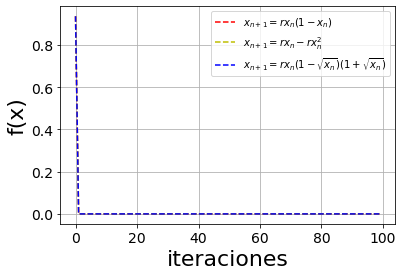

las funciones no presentan variaciones


In [389]:
r = [1.9, 2.9, 3.1, 3.5, 3.9]
xi = 0.6
N = 100

for i in r:
 d1 = f1(i,xi,N)
 d2 = f2(i,xi,N)
 d3 = f3(i,xi,N)
plt.plot(d1["t"],d1["x"],"r--",label=r'$x_{n+1}=rx_n(1-x_n)$')
plt.plot(d2["t"],d2["x"],"y--",label =r'$x_{n+1}=rx_n-rx_n^2$')
plt.plot(d3["t"],d3["x"],'b--',label=r'$x_{n+1}=rx_n(1-\sqrt{x_n})(1+\sqrt{x_n})$')
plt.xlabel("iteraciones",fontsize=22)
plt.ylabel("f(x)",fontsize=22)
plt.grid()
plt.legend()
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14)
plt.show()  

print('las funciones no presentan variaciones')